In [1]:
from utils import utils
import cv2 as cv
import numpy as np
import torch
from matplotlib import pyplot as plt
import os
from torchvision import transforms

content_img_path = "content.png"
style_img_path = "style.jpg"

In [2]:
content_img = utils.load_image(content_img_path)
style_img = utils.load_image(style_img_path)

In [7]:
img = cv.imread(content_img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img

array([[[ 56,  81, 115],
        [ 44,  84, 113],
        [ 68,  98, 136],
        ...,
        [ 58, 115, 171],
        [ 62, 116, 172],
        [ 62, 116, 172]],

       [[ 50,  82, 119],
        [ 59,  93, 124],
        [ 49,  75, 108],
        ...,
        [ 63, 113, 170],
        [ 66, 116, 176],
        [ 63, 114, 174]],

       [[ 51,  85, 112],
        [ 58,  90, 117],
        [ 65, 106, 138],
        ...,
        [ 61, 116, 173],
        [ 59, 116, 174],
        [ 59, 117, 178]],

       ...,

       [[ 25,  26,  21],
        [ 21,  23,  17],
        [ 21,  23,  21],
        ...,
        [151, 130, 100],
        [144, 124,  95],
        [150, 131, 106]],

       [[ 26,  25,  24],
        [ 19,  19,  18],
        [ 23,  25,  20],
        ...,
        [151, 133, 108],
        [155, 132, 102],
        [164, 135, 105]],

       [[ 23,  23,  21],
        [ 15,  15,  13],
        [ 17,  18,  13],
        ...,
        [131, 122,  94],
        [133, 121,  95],
        [130, 110,  89]]

In [9]:
img.shape

(384, 512, 3)

In [12]:
img = utils.load_image(content_img_path)
img.shape

torch.Size([1, 3, 384, 512])

In [15]:
gaussian_noise_img = np.random.normal(loc=0, scale=90., size=img.shape).astype(np.float32)
gaussian_noise_img.shape

(1, 3, 384, 512)

In [25]:
t1 = torch.tensor([[1.0,2.0], [3.0,4.0]])
t2 = torch.tensor([[5.0,6.0], [7.0,8.0]])

torch.nn.MSELoss(reduction='sum')(t1, t2)

tensor(64.)

In [26]:
content_tensor = torch.tensor(content_img)
print(content_tensor.size())
content_tensor = content_tensor.unsqueeze(0)
print(content_tensor.size())
content_tensor.dtype

torch.Size([384, 512, 3])
torch.Size([1, 384, 512, 3])


torch.float32

In [28]:
gaussian_noise = np.random.normal(loc=0, scale=90., size=content_tensor.shape).astype(np.float32)
gaussian_noise = torch.from_numpy(gaussian_noise)
gaussian_noise.dtype

torch.float32

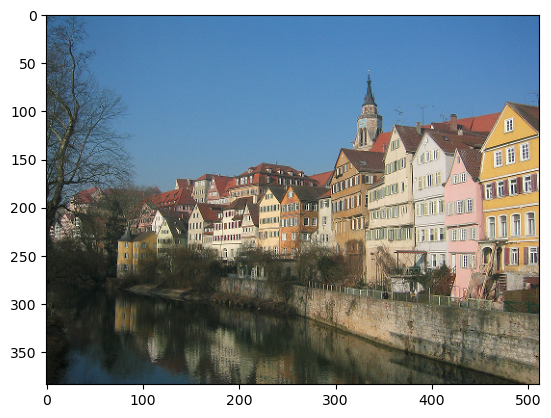

In [31]:
plt.imshow(content_img.astype(np.uint8))

In [33]:
from models import vgg_nets

In [35]:
neural_net = vgg_nets.Vgg16()
content_feature_maps = neural_net(content_tensor)

content_feature_maps

RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[1, 384, 512, 3] to have 3 channels, but got 384 channels instead

In [54]:
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

In [75]:
def loader(img_path, target_shape=None):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255)),
        transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
    ])

    img = transform(img).unsqueeze(0)

    return img

img = loader(content_img_path)
img.shape

torch.Size([1, 3, 384, 512])

In [76]:
neural_net_eval = vgg_nets.Vgg16().eval()
neural_net = vgg_nets.Vgg16()
eval_maps = neural_net_eval(img)
maps = neural_net(img)


In [79]:
eval_maps - maps

TypeError: unsupported operand type(s) for -: 'VggOutputs' and 'VggOutputs'

In [3]:
", ".join("1 5 1 4 2 5 4 5 4 5 6 1 1 6 6 1 4 3 5 1 5 3 3 4 3 2 3 1 6 1 3 1 1 6 6 6 4 1 2 6 4 3 4 6 4 2 2 5 2 4 5 6 1 3 2 3 5 5 3 5 5 2 5 2 3 2 4 3 2 3 2 3 3 1 3 6 3 5 3 1 3 1 1 2 4 6 1 1 5 3 6 3 4 3 4 3 6 4 1 2".split())

'1, 5, 1, 4, 2, 5, 4, 5, 4, 5, 6, 1, 1, 6, 6, 1, 4, 3, 5, 1, 5, 3, 3, 4, 3, 2, 3, 1, 6, 1, 3, 1, 1, 6, 6, 6, 4, 1, 2, 6, 4, 3, 4, 6, 4, 2, 2, 5, 2, 4, 5, 6, 1, 3, 2, 3, 5, 5, 3, 5, 5, 2, 5, 2, 3, 2, 4, 3, 2, 3, 2, 3, 3, 1, 3, 6, 3, 5, 3, 1, 3, 1, 1, 2, 4, 6, 1, 1, 5, 3, 6, 3, 4, 3, 4, 3, 6, 4, 1, 2'

In [44]:
import cv2 as cv
import numpy as np
import os

from torchvision import transforms

IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

def load_image(img_path, target_shape=None):
    if not os.path.exists(img_path):
        raise Exception(f'Path does not exist: {img_path}')
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.Lambda(lambda x: x.mul(255)),
        transforms.Normalize(mean=IMAGENET_MEAN, std=IMAGENET_STD)
    ])

    img = transform(img).unsqueeze(0)

    return img

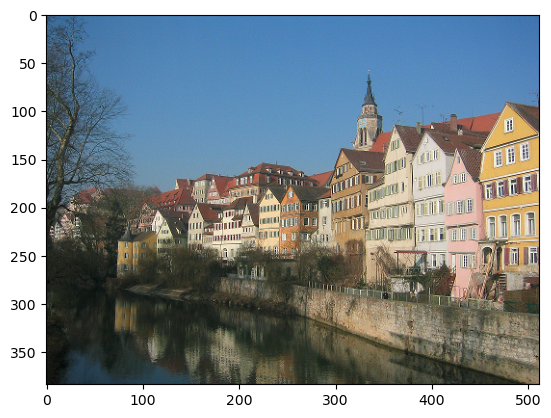

In [50]:
from matplotlib import pyplot as plt

content_img_path = "content.png"

content_img = load_image(content_img_path)

display = content_img.squeeze(axis=0).numpy()
display = np.moveaxis(display, 0, 2)

# display *= np.array(IMAGENET_STD).reshape((1,1,3))
# display += np.array(IMAGENET_MEAN).reshape((1, 1, 3))

display *= np.array(np.multiply(IMAGENET_STD,255)).reshape((1,1,3))
display += np.array(np.multiply(IMAGENET_MEAN, 255)).reshape((1, 1, 3))

display = np.clip(display, 0, 255).astype("uint8")
cv.imwrite(os.path.join("./data/results/", "temp.png"), display[:, :, ::-1])

plt.imshow(display)

In [5]:
from utils import utils
from matplotlib import pyplot as plt

content_img_dir = "./data/content_images/"
style_img_dir = "./data/style_images/"
output_img_dir = "./data/output_images/"

content_img_name = "tubingen.png"
style_img_name = "vg_starry_night.jpg"

content_img_path = content_img_dir + content_img_name
style_img_path = style_img_dir + style_img_name

content_img = utils.load_image(content_img_path)
    # print(content_img.size())
    # cv.imshow("Content Image", content_img.squeeze(axis=0).numpy().size())
style_img = utils.load_image(style_img_path)

content_weight = 1e5
style_weight = 3e4
tv_weight = 1e0

optimized_img_name = "NewImg"
output_dir_name = content_img_name.split(".")[0] + " styled as " + style_img_name.split(".")[0] + "/"
dump_path = output_img_dir + output_dir_name

dump_path

'./data/output_images/tubingen styled as vg_starry_night/'

In [2]:
import os

default_resource_dir = os.path.join(os.path.dirname(__file__), 'data')
content_img_dir = os.path.join(default_resource_dir, 'content_images')
style_img_dir = os.path.join(default_resource_dir, 'style_images')
output_img_dir = os.path.join(default_resource_dir, 'output_images')

os.listdir(content_img_dir)

NameError: name '__file__' is not defined

In [2]:
import json

config = json.load(open('config.json'))
config

{'content_img_name': 'tubingen.png',
 'style_img_name': 'vg_starry_night.jpg',
 'content_weight': 100000.0,
 'style_weight': 30000.0,
 'tv_weight': 1.0,
 'init_img': 'content',
 'optimizer': 'LBFGS'}

In [6]:
import os
import moviepy.video.io.ImageSequenceClip as ISC

dump_path = 'E:\\M.Sc. Data Science\\3rd Sem\\Neural Style Transfer\\Neural-Style-Transfer\\data\\output_images\\tubingen styled as vg_starry_night\\100000 30000 1'

fps=30

image_files = [os.path.join(dump_path,img)
               for img in os.listdir(dump_path)
               if img.endswith(".png")]

clip = ISC.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(os.path.join(dump_path, 'out.mp4'), verbose=False, logger=None)

101


In [5]:
from utils import utils

utils.create_video("E:\\M.Sc. Data Science\\3rd Sem\\Neural Style Transfer\\Neural-Style-Transfer\\data\\output_images\\tubingen styled as wave_crop\\100000 10000 1")

In [10]:
import moviepy.video.io.ImageSequenceClip as ISC
import os

dump_path = "E:\\M.Sc. Data Science\\3rd Sem\\Neural Style Transfer\\Neural-Style-Transfer\\data\\output_images\\tubingen styled as wave_crop\\100000 10000 1"

fps=25
images = [img for img in os.listdir(dump_path) if img.endswith(".png")]
images.sort()
image_files = [os.path.join(dump_path,img) for img in images]


clip = ISC.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(os.path.join(dump_path, 'out.mp4'), verbose=False, logger=None)

In [1]:
type(1e5)

float